In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#data_process = pd.read_csv("entrada.csv")
alarm_var = pd.read_csv("alarm_list.csv")

In [2]:
def step_signal (low, high, s_low=0.2, s_high=0.2, larg_high_i=20, larg_high_f=100, larg_low_i=20, larg_low_f=100, prob_positivo=0.5, n=100):
       
    distrib = np.random.binomial(1,prob_positivo,n)
    signal = np.concatenate([np.random.uniform(high-s_high,high+s_high,np.random.randint(larg_high_i, larg_high_f)) if x == 1 else np.random.uniform(low-s_low,low+s_low,np.random.randint(larg_low_i, larg_low_f)) for x in distrib])
    return signal


In [78]:
def alarm_seq (df,v_list):
    seq = []
    for v in v_list:
        seq.append(alarm_generate(df[v["proces_var"]],v))
    
    return seq

In [69]:
def alarm_generate(df, var_list):
    '''alarm_generate is a function when return a vector '''
    
    t_delay = 0
    t_dead = 0
    log_alarm = np.arange(len(df))
    #print(x)
    if var_list["type_var"] == 'high':
        for i in np.arange(len(df)):
            if df[i] > var_list["limit"]:
                t_dead = 0
                t_delay = t_delay + 3/len(df)
                if t_delay >= var_list["delay_time"]:
                    log_alarm[i] = 1
                else:
                    log_alarm[i] = 0
            else:
                if log_alarm[i-1] == 1:
                    t_dead = t_dead + 3/len(df)
                    if t_dead >= var_list["dead_band_delay"]:
                        log_alarm[i] = 0
                        t_delay = 0
                        t_dead = 0
                    else:
                        log_alarm[i] = 1
                else:
                    t_delay = 0
                    t_dead = 0
                    log_alarm[i] = 0
    else:
        for i in np.arange(len(df)):
            if df[i] < limit:
                t_dead = 0
                t_delay = t_delay + 3/len(df)
                if t_delay >= var_list["delay_time"]:
                    log_alarm[i] = 1
                else:
                    log_alarm[i] = 0
            else:
                if log_alarm[i-1] == 1:
                    t_dead = t_dead + 3/len(df)
                    if t_dead >= var_list["dead_band_delay"]:
                        log_alarm[i] = 0
                        t_delay = 0
                        t_dead = 0
                    else:
                        log_alarm[i] = 1
                else:
                    t_delay = 0
                    t_dead = 0
                    log_alarm[i] = 0

    return log_alarm

In [4]:
x_ = []
for i in np.arange(10):
    x_.append(step_signal(3,7))

In [5]:
for i in np.arange(10):
    if len(x_[0]) > len(x_[i]):
        if x_[i][-1] >= 2.8 and x_[i][-1] <= 3.2:
            x_[i] = np.concatenate((x_[i],np.random.uniform(3-0.2,3+0.2,len(x_[0])-len(x_[i]))))
        elif x_[i][-1] >= 6.7 and x_[i][-1] <= 7.3:
            x_[i] = np.concatenate((x_[i],np.random.uniform(7-0.3,7+0.3,len(x_[0])-len(x_[i]))))
    else:
        delete = np.nonzero(x_[i][len(x_[0]):])
        x_[i] = np.delete(x_[i],delete)
    
    
limit = 5 
type_ = 'high' 
delay_time = 100*3/len(x_[0])
dead_band_delay = 70*3/len(x_[0])
t_delay = 0
df = pd.DataFrame()
for i in np.arange(10):
    df['x'+str(i)] = x_[i]
    
tout = np.arange(0,3,3/len(x_[0]),dtype=float)    
df.insert(0,'tout',tout)

In [49]:
var_list = [{
    "limit": 5,
    "type_var":'high', 
    "delay_time" : 100*3/len(x_[0]), 
    "dead_band_delay" : 70*3/len(x_[0]),
    "proces_var": 'x0'
    },
    {
    "limit": 5,
    "type_var":'low', 
    "delay_time" : 100*3/len(x_[0]), 
    "dead_band_delay" : 70*3/len(x_[0]),
    "proces_var": 'x1'    
    },
    {
    "limit": 4.5,
    "type_var":'high', 
    "delay_time" : 100*3/len(x_[0]), 
    "dead_band_delay" : 70*3/len(x_[0]),
    "proces_var": 'x2'
    },
    {
    "limit": 6,
    "type_var":'low', 
    "delay_time" : 100*3/len(x_[0]), 
    "dead_band_delay" : 70*3/len(x_[0]),
    "proces_var": 'x3'
    }
]

In [54]:

# log = []
# for i in np.arange(10):
#     log.append(alarm_generate(df, var_list))
    

df_log = pd.DataFrame
df_log = alarm_generate(df['x0'], var_list[0])

In [12]:
?alarm_generate

In [13]:
x1 = []

df_new = df.drop(['tout'],axis=1)

for i in np.arange(10):
    x1.append(df_new['x'+str(i)])
    

#df_new = df.drop(['tout'],axis=1).as_matrix()

In [62]:
var_list[0]["proces_var"]

'x0'

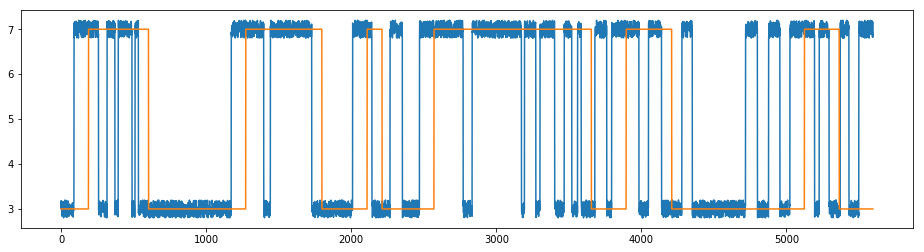

In [53]:
plt.figure(figsize=(16,4))
plt.plot(df['x0'])
plt.plot(df_log*4+3)

In [79]:
df_log = pd.DataFrame
df_log = alarm_seq(df,var_list)

In [80]:
df_log

[array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 1, 1]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0])]